<img src="media/coco-banner.jpg">

## Rasterio

[ Rasterio ](https://rasterio.readthedocs.io/en/latest/) is a popular python library used to import and manipulate different types of raster files. When rasters are imported into python using Rasterio, it is imported as a numpy 2D array. Rasterio works with [ GDAL ](https://gdal.org/) dependencies to be able to read in different types of raster data. We will be working with an image and manipulate it a bit for today's class. We will learn how to: 
* import a raster file
* manipulate the data
* visualize the data
* export data with geographic information


Let's start by importing some elevation data. The steps to import data are as follows: 
* use Pathlib to connect to the file path
---
[ Rasterio ](https://rasterio.readthedocs.io/en/latest/) es una libreria  de python que se utiliza para importar y manipular diferentes tipos de archivos raster. Cuando se importan a python usando Rasterio, se importan como una matriz numpy 2D. Rasterio trabaja con dependencias [ GDAL ](https://gdal.org/) para poder leer en diferentes tipos de datos raster. Trabajaremos con una imagen y la manipularemos un poco para la clase de hoy. Aprenderemos a:
* importar un archivo raster
* manipular los datos
* visualizar los datos
* exportar datos con información geográfica


Comencemos importando algunos datos de elevación. Los pasos para importar datos son los siguientes: 
* use Pathlib para conectarse a la ruta del archivo

In [1]:
from pathlib import Path

In [2]:
US_DEM = Path(".")/ "data" / "30n120w_20101117_gmted_mea300.tif"

This DEM was downloaded from the [ USGS EarthExplorer ](https://earthexplorer.usgs.gov/). Now, let's read in the data with rasterio! We can use rasterio to read in the tif file to see what type of data we have available.

---

Este archivo fue descargado usando el [ USGS EarthExplorer ](https://earthexplorer.usgs.gov/). ¡Ahora, vamos a leer los datos con rasterio! Podemos usar rasterio para leer en el archivo tif para ver qué tipo de datos tenemos disponibles.

In [3]:
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np

In [4]:
dataset = rio.open(US_DEM) #let's see what's in this dataset

Here's a few commands you should know when working with rasterio:
* file.count - provides the number of bands in the dataset
* file.shape - returns the shape of the raster file
* file.bounds - bounding box for the dataset
* file.transform - provides an affine transformation matrix (this will be important when saving a raster)
* file.crs - provides the coordinate reference system of the dataset

Let's look at these commands!

---

Aquí hay algunos comandos que debe saber al trabajar con rasterio:
* file.count: mirar el número de bandas en el conjunto de datos
* file.shape - devuelve la forma del archivo raster
* file.bounds - cuadro delimitador para el conjunto de datos
* file.transform: proporciona una matriz de transformación afín (esto será importante al guardar un ráster)
* file.crs: proporciona el sistema de referencia de coordenadas del conjunto de datos

¡Veamos estos comandos!

In [5]:
print(dataset.count) #provides number of bands / proporciona número de bandas

1


In [9]:
print(dataset.shape) #shape of dataset / forma del conjunto de datos

(2400, 3600)


In [10]:
print(dataset.bounds) #bounding box of dataset / cuadro delimitador de conjunto de datos

BoundingBox(left=-120.00013888888888, bottom=29.99986111111111, right=-90.00013888888888, top=49.99986111111111)


In [26]:
print(dataset.transform) #affine transformation matrix. 

| 0.01, 0.00,-120.00|
| 0.00,-0.01, 50.00|
| 0.00, 0.00, 1.00|


In [ ]:
print(dataset.crs)

Let's start exploring the dataset! | Vamos a ver que tenemos en el archivo

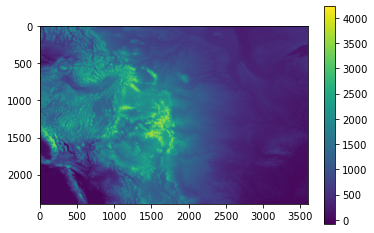

In [6]:
band1 = dataset.read(1) #you can change the value based on what band you want to read
plt.imshow(band1)
plt.colorbar()

### Formative Assessment 1
What do you think will be the datatype for the variable named "band1"?
* raster
* float
* integer
* array

---

¿Cuál cree que será el tipo de datos para la variable llamada "band1"?
* raster
* float
* integer
* array

In [ ]:
### check the datatype here! 


Using numpy, we can work with the data and save our new raster. First, let's zoom in to the point with the highest elevations on the map. 

---

Usando numpy, podemos trabajar con los datos y guardar nuestro nuevo ráster. Primero, acerquemos el punto con las elevaciones más altas en el mapa.

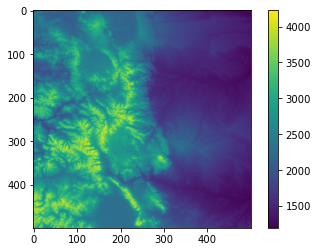

In [7]:
zoom = band1[1000:1500,1500:2000]
plt.imshow(zoom)
plt.colorbar()

## Practice exercise: (5 minutes)
### Using the variable named band1, zoom in to a different region of the DEM. I will then pick on a few of you to share your screen and show us your zoomed in figure.  


We can also mask areas of interest based on the values in the array. In the following example, we will be replacing values of interest with nan values to mask specific areas in our image that are associate with those values.

---

También podemos enmascarar áreas de interés según los valores de la matriz. En el siguiente ejemplo, reemplazaremos valores de interés con valores nan para enmascarar áreas específicas en nuestra imagen que están asociadas con esos valores.

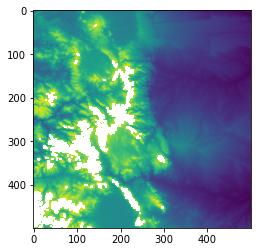

In [8]:
zoom = np.where(zoom>3500, np.nan, zoom)
plt.imshow(zoom)

Now let's save our manipulated and zoomed in raster file! Note: because this raster is smaller than our original raster, we will need to change the affine matrix to account for this change. 

---

¡Ahora guardemos nuestro archivo ráster manipulado y ampliado! Nota: debido a que este ráster es más pequeño que nuestro ráster original, necesitaremos cambiar la matriz afín para tener en cuenta este cambio.

In [9]:
from rasterio.transform import Affine
print(dataset.transform)

x = np.linspace(0,499,500)
y = np.linspace(0,499,500)


res = dataset.transform[0]
transform = Affine.translation(x[0] - res / 2, y[0] - res / 2) * Affine.scale(res, res)


with rio.open(
    'data/new.tif',
    'w',
    driver='GTiff',
    height=zoom.shape[0],
    width=zoom.shape[1],
    count=1,
    dtype=zoom.dtype,
    crs='EPSG:4326',
    transform=transform,
) as dst:
    dst.write(zoom, 1)


| 0.01, 0.00,-120.00|
| 0.00,-0.01, 50.00|
| 0.00, 0.00, 1.00|


In [10]:
OurData = Path(".")/ "data" / "new.tif"

| 0.01, 0.00,-0.00|
| 0.00, 0.01,-0.00|
| 0.00, 0.00, 1.00|


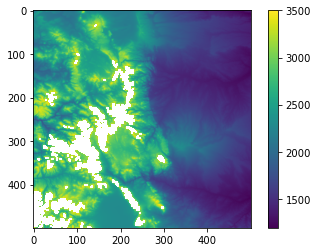

In [11]:
test = rio.open(OurData)
newBand = test.read(1)
plt.imshow(newBand)
plt.colorbar()

## Windowed reads
Sometimes we have very large raster datasets which makes it computationally expensive to read in. We can use the [ windowed reads ](https://rasterio.readthedocs.io/en/latest/topics/windowed-rw.html) function which only reads in part of the dataset!

---

A veces tenemos conjuntos de datos ráster muy grandes, lo que hace que la lectura sea computacionalmente costosa. Podemos usar la función [lecturas en ventana] (https://rasterio.readthedocs.io/en/latest/topics/windowed-rw.html) que solo lee en parte del conjunto de datos!

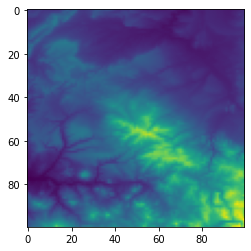

In [12]:
from rasterio.windows import Window
with rio.open('data/new.tif') as src:
    w = src.read(1, window=Window(0, 0, 100, 100))
    plt.imshow(w)

# Xarray

[_Xarray_](https://docs.xarray.dev/) is a Python package that makes working with labelled multi-dimensional arrays (like stacks of images) in Python simple, efficient, and fun. It has extensions for specific domains, for example the [Rioxarray](https://corteva.github.io/rioxarray) adds functionality for geospatial raster data. The name "RIO" comes from "RasterIO"(Input/Output), because the extension makes use of yet another great open source package [RasterIO](https://rasterio.readthedocs.io).   

We will learn about:
* How to open a satellite image ([Landsat Collection 2](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2))
* How to extract quantitative data from geospatial coordinates
* How to make different plots
* How to save an image for GIS software like [QGIS](https://www.qgis.org/)
* How to scale analysis with *lots* of images using [Microsoft's Planetary Computer](https://planetarycomputer.microsoft.com/)

---

Xarray hace que trabajar con datos n-dimensionales (conjuntos de imagenes) sea sencillo, eficaz, y divertido! Tiene extenciones para varios dominios cientificos, por ejemplo Rioxarray aggrega funciones para trabajar con datos cuadriculares geospaciales (imagenes de satellite) comun en geociencias. El nombre 'RIO' viene de "RasterIO" (IO = Input/Output), porque la extencion utiliza otro paquete libre en Python: RasterIO.

Vamos a aprender:
* Abrir imagenes satelitales (Landsat Collection 2)
* Extraer datos cuantativos segun coordenates geospaciales
* Crear graficas analyticas
* Guardar un imagen para otro software como QGIS
* Empezar a analysis conjuntos de imagenes con Microsoft Planetary Computer

![Xarray Diagram](https://docs.xarray.dev/en/stable/_images/dataset-diagram.png)

## Import Xarray | Importar Xarrray

In [14]:
import xarray as xr

Using the raster file we have been working with, we will quickly import it with xarray:

In [ ]:
US_DEM = xr.open_dataarray('data/30n120w_20101117_gmted_mea300.tif', 
                       engine='rasterio',
                      )
US_DEM

We must specifiy `engine='rasterio'` to use the RioXarray extension, which recognizes file formats like [Geotiff (.tif)](https://gdal.org/drivers/raster/index.html). Note the returned data object is a 3 dimensional DataArray ('band', 'y', 'x').

---

Usamos `engine='rasterio'` para utilizar la extension RioXarray, la cual tiene funciones para leer formatos geospaciales.

In [ ]:
#same workflow with xarray

da = xr.open_dataarray(US_DEM, engine='rasterio').squeeze()
zoom = da.isel(y=slice(1000,1500), x=slice(1500,2000))
zoom = zoom.where(zoom <= 3500) #only keep these elevations
plt.imshow(zoom)
zoom.rio.to_raster('zoomed.tif')

Now let's look at importing data using the planetary computer. We import other packages that we're going use in this notebook | También importamos otros paquete que usaremos en este notebook.

In [15]:
import requests
import os

import planetary_computer 
import geopandas as gpd
import pystac_client
import odc.stac

Do not worry about understanding the following cell, you can come back to it later. It creates a local copy of an image that we will use for this tutorial

---

No es necesario revisar la celula siguiente, puedes volver a estudiarlo despues. El Codigo crea un archivo de la imagen que usaremos.

In [16]:
# Example Raster from https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2#Example-Notebook
tif_url = 'https://landsateuwest.blob.core.windows.net/landsat-c2/level-2/standard/oli-tirs/2021/046/027/LC08_L2SP_046027_20210725_20210803_02_T1/LC08_L2SP_046027_20210725_20210803_02_T1_SR_B5.TIF'
output = './data/LC08_L2SP_046027_20210725_20210803_02_T1_SR_B5_OV2.tif'

def save_local_copy(tif, output):
    """ Save low resolution geotiff from planetary computer for tutorial """
    
    URL = f'https://planetarycomputer.microsoft.com/api/sas/v1/sign?href={tif}'
    response = requests.get(URL).json()
    signed_url = response['href'] # also "msft:expiry" (45min if anonymous request)
    
    if not os.path.exists(output):
        da = xr.open_dataarray(signed_url, 
                               engine='rasterio',
                               open_kwargs=dict(overview_level=2)
                              )
        da.rio.to_raster(output)
        

save_local_copy(tif_url, output)

☝️ Many remote sensing datasets require authentication to access (NASA uses ["Earth Data Login"](https://urs.earthdata.nasa.gov). Microsoft's Planetary Computer uses an [API to sign URLs](https://planetarycomputer.microsoft.com/docs/concepts/sas/) given time-limited access. This is why we create a `signed_url` above. Note we stored a local copy for convenience (LC08_L2SP_046027_20210725_20210803_02_T1_SR_B5_OV2.tif), but Xarray can also read files directly from URLs! 

---

Muchos archivos de imagenes satelitales requiren que obtengas permiso para bajar datoes (NASA utiliza "Earth Data Login", Microsoft Planetary Computer utiliza un API para creare vinculos valido por un tiempo limitado. Por eso arriba creamos un `singed_url`. Ojo: Guardamos una copia del archivo (LC08_L2SP_046027_20210725_20210803_02_T1_SR_B5_OV2.tif), pero Xarray tambien puede leer directamente del URL:

## How to read data? | ¿Cómo abrir datos?

### DataArray

A _DataArray_ is a N-dimensional data structure. Commonly with geospatial data we have a cube with 3 dimensions: x,y,time. But you could add even more dimensions like 'depth', 'band', 'polarization', 'experiment number',  etc. Xarray provides nice HTML-representations of it's data objects when you're using a Jupyter Notebook:
 
---

_DataArray_ es una representacion de datos regulares con N-dimeniones. Frequentamente en geociences tenemos 3 dimensions: x,y,tiempo. A veces hay aun más dimensiones: 'profundidad', 'banda', 'polarizacion', etc. En Jupyter Notebooks Xarray te demuestra una representacion grafica conveniente de este objecto:

In [ ]:
da = xr.open_dataarray('./data/LC08_L2SP_046027_20210725_20210803_02_T1_SR_B5_OV2.tif', 
                       engine='rasterio',
                      )
da

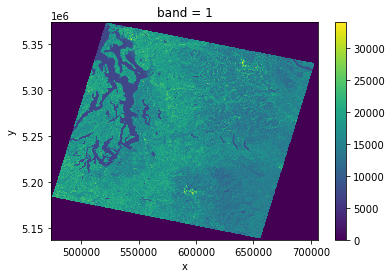

In [47]:
da.plot();

The `spatial_ref` coordinate has Coordinate Reference System (CRS) Information. This dataset is 'Universal Tranverse Mercator (UTM)'. Rioxarray has methods that can be accessed via the `.rio` attribute, for example to display the CRS (https://epsg.io/32610)

In [49]:
da.crs

'+init=epsg:32610'

In [58]:
da.rio.resolution() #Units?

(239.84567901234567, 0.0, 473385.0, 0.0, -239.84802431610942, 5373615.0)

In [ ]:
# reproject to lon/lat
daLL = da.rio.reproject('EPSG:4326')
daLL

Note: the dimensions have the same names ('x','y'). But now the coordinate *values* are 'longitude', 'latitude' instead of 'easting' and 'northing'. Also because we've reprojected the orginal data onto a new grid, the total size of the array has changed from (987, 972) to (802, 1171)

In [ ]:
daLL.plot();

## Sampling | Leer valores

Xarray uses sampling based on either real-world coordinates (`.sel`) or row/col (`.isel`). This is similar to Pandas  `loc` or `.iloc` !

---

Xarray puede leer valores de los pixels con indices del coordinates geograficas (`.sel`) o fila, columna del matriz (`.isel`), similar a Pandas `.loc` y `iloc`

In [ ]:
daLL.sel(y=47.0, x=-122.0, method='nearest') # Return a DataArray

In [ ]:
daLL.sel(y=47.0, x=-122.0, method='nearest').data # Return a numpy Array

In [ ]:
# Zoom in on Mt Rainier
daLL.sel(y=slice(47.0, 46.7), x=slice(-122.0, -121.5)).plot();

In [ ]:
# Extract a profile (best in UTM for x-axis in meters)
da.sel(y=5.2e6, method='nearest').plot();

## Save a copy | Guardar archivo

Let's say we want to save a copy of our cropped image to use later or in a different program like QGIS, Rioxarray allows us to write to various formats. Geotiff is the default:

---

Si queremos guardar una copia de la imagen cortado para usar luego o abrir en software different como QGIS, Rioxarray nos permite escribe formatos diferentes. Geotiff por defecto:

In [ ]:
daCrop = daLL.sel(y=slice(47.0, 46.7), x=slice(-122.0, -121.5))
daCrop.rio.to_raster('mt_rainier.tif')

In [ ]:
xr.open_dataarray('mt_rainier.tif', engine='rasterio').plot();

## Homework

Please make an account to explore the [ planetary computer ](https://planetarycomputer.microsoft.com/account/request). After creating an account, download data of your choice that you can read in to python, using Rasterio / Xarray. Manipulate the data with numpy and save the imagery as a GeoTiff. I'm excited to see what you come up with! 

---

Cree una cuenta para explorar el [ planetary computer ](https://planetarycomputer.microsoft.com/account/request). Después de crear una cuenta, descargue los datos de su elección que pueda leer en python, usando Rasterio/Xarray. Manipule los datos con numpy y guarde las imágenes como GeoTiff. ¡Estoy emocionado de ver lo que se te ocurre!
